In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
medic=pd.read_csv("medical_examination.csv")

In [3]:
#cleaning the data
medic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
medic["sex"].unique()

array([2, 1, 3], dtype=int64)

In [5]:
#age in days
medic["age"].min()//365,medic["age"].max()//365

(29, 64)

In [6]:
#the height in cm
medic["height"].min(),medic["height"].max()

(55, 250)

In [7]:
#55 is wrong any height less than 1 meter is wrong when age min is 29 
#fix by change the height to median
medic.loc[medic["height"]<100,"height"]=medic["height"].median()
medic["height"].min()

100

In [8]:
def is_overweight(weight,height):
    height_in_meters=height/100
    result=weight/(height_in_meters**2)
    if result > 25:
        return 1
    return 0

In [9]:
#add an overweight column
medic["overweight"]=medic.apply(lambda x:is_overweight(x["weight"],x["height"]),axis=1)

In [10]:
# normalize the data by making 0 good 1 bad
def normalize_data(c):
    if c>=2:
        return 1
    return 0
# normalize gluc and cholesterol 
medic["gluc"]=medic.apply(lambda x:normalize_data(x["gluc"]),axis=1)
medic["cholesterol"]=medic.apply(lambda x:normalize_data(x["cholesterol"]),axis=1)

<Axes: >

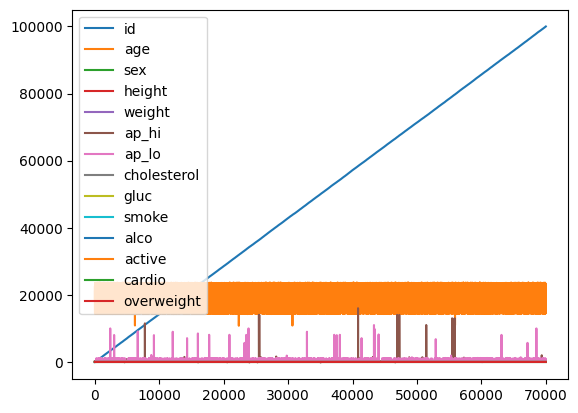

In [11]:
medic.plot()

In [12]:
medic_cat=pd.melt(medic,id_vars=["cardio"],value_vars=["cholesterol",
                         "gluc","smoke","alco","active","overweight"])

In [13]:
medic_cat.shape

(420000, 3)

In [14]:
medic_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [15]:
medic_cat["variable"].value_counts()

variable
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
overweight     70000
Name: count, dtype: int64

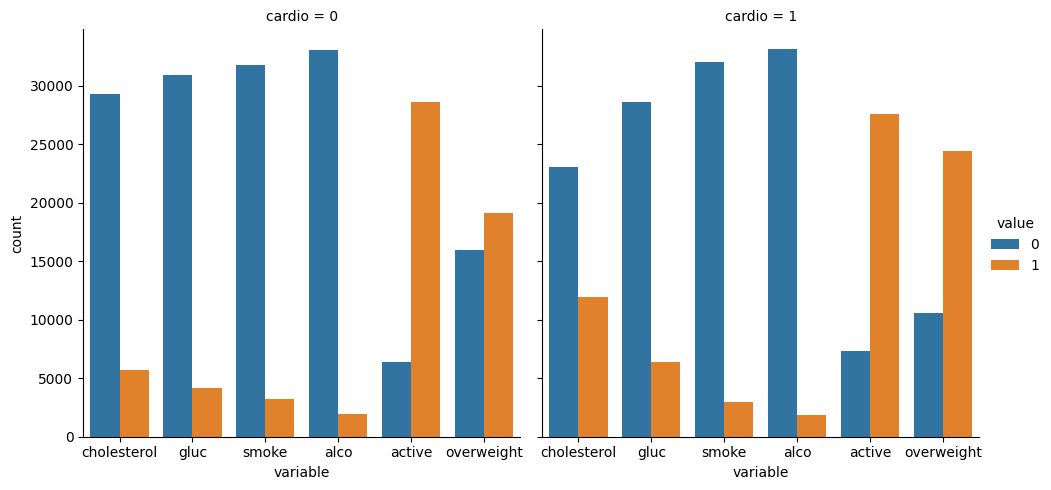

In [16]:

sb.catplot(x="variable",col="cardio",data=medic_cat,kind="count",hue="value")

In [17]:
# clean data 
medic_heat=medic[(medic["ap_lo"]<=medic["ap_hi"]) &
(medic["height"]>= medic["height"].quantile(0.025)) &
(medic["height"]<=medic["height"].quantile(0.975)) &
(medic ["weight"]>= medic["weight"].quantile(0.025)) &
(medic ["weight"] <= medic["weight"].quantile(0.975)) ]

<Axes: >

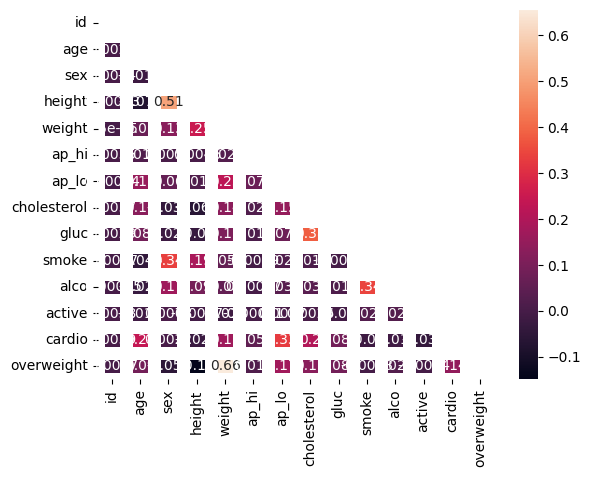

In [27]:
# correlation matrix and plot it
medic_corr=medic_heat.corr()
#create the mask 
mask=np.zeros_like(medic_corr,dtype=bool)
upper_triangle=np.triu_indices_from(mask)
mask[upper_triangle]=1

sb.heatmap(medic_corr,annot=True,mask=mask,linewidths=8)
